# Algae Example
Author(s): Paul Miles | Date: June 18, 2018

This is a simplified lake algae dynamics model. We consider phytoplankton $A$, zooplankton $Z$ and nutrition $P$ (eg. phosphorus) available for $A$ in the water. The system is affected by the water outflow/inflow $Q$, incoming phosphorus load $P_{in}$ and temperature $T$. It is described as a simple predator - pray dynamics between $A$ and $Z$. The growth of $A$ is limited by the availability of $P$ and it depends on the water temperature $T$. The inflow/outflow $Q$ affects both $A$ and $P$, but not $Z$.

In [1]:
# import required packages
import algaefunctions as algfun
import numpy as np
import scipy.io as sio
from pymcmcstat.MCMC import MCMC
from pymcmcstat.plotting import MCMCPlotting
import matplotlib.pyplot as plt

The data is saved in a `.mat` file as the original example comes from the Matlab.  We extract the necessary data as follows

In [2]:
# load Algae data
algaedata = sio.loadmat('algaedata.mat')
# extract dictionary contents
adata = algaedata['data']
tx = adata['xdata'][0][0]
ty = adata['ydata'][0][0]
xlbls = adata['xlabels'][0][0][0]
ylbls = adata['ylabels'][0][0][0]

### Initialize MCMC Object
- Define data structure
- Assign parameters and define constraints
- Set simulation options and model settings

In [3]:
# initialize MCMC object
mcstat = MCMC()
# initialize data structure 
mcstat.data.add_data_set(x = tx[:,0], y = ty[:,0:4], user_defined_object = tx)

# initialize parameter array
#theta = [0.5, 0.03, 0.1, 10, 0.02, 1.14, 0.77, 1.3, 10]
# add model parameters
mcstat.parameters.add_model_parameter(name = 'mumax', theta0 = 0.5, minimum = 0)
mcstat.parameters.add_model_parameter(name = 'rhoa', theta0 = 0.03, minimum = 0)
mcstat.parameters.add_model_parameter(name = 'rhoz', theta0 = 0.1, minimum = 0)
mcstat.parameters.add_model_parameter(name = 'k', theta0 = 10, minimum = 0)
mcstat.parameters.add_model_parameter(name = 'alpha', theta0 = 0.02, minimum = 0)
mcstat.parameters.add_model_parameter(name = 'th', theta0 = 1.14, minimum = 0, maximum = np.inf, prior_mu = 0.14, prior_sigma = 0.2)
# initial values for the model states
mcstat.parameters.add_model_parameter(name = 'A0', theta0 = 0.77, minimum = 0, maximum = np.inf, prior_mu = 0.77, prior_sigma = 2)
mcstat.parameters.add_model_parameter(name = 'Z0', theta0 = 1.3, minimum = 0, maximum = np.inf, prior_mu = 1.3, prior_sigma = 2)
mcstat.parameters.add_model_parameter(name = 'P0', theta0 = 10, minimum = 0, maximum = np.inf, prior_mu = 10, prior_sigma = 2)

# Generate options
mcstat.simulation_options.define_simulation_options(nsimu = int(1.0e3), updatesigma = 1)
# Define model object:
mcstat.model_settings.define_model_settings(sos_function = algfun.algaess, sigma2 = 0.01**2, S20 = np.array([1,1,2]), N0 = np.array([4,4,4]))

The code takes some time to run, so here we simply check to make sure the data structure can be processed using our sum-of-squares function.  Note, we have separate sum-of-squares for each quantity of interest and there will be a separate error variance for each as well.

In [4]:
# check model evaluation
theta = [0.5, 0.03, 0.1, 10, 0.02, 1.14, 0.77, 1.3, 10]
ss = algfun.algaess(theta, mcstat.data)
print('ss = {}'.format(ss))

ss = [ 930.44890289  521.2441601  1278.11736803]


## Run simulation
- We run an initialize sequence of 1000, then restart and perform another 5000

In [5]:
# Run simulation
mcstat.run_simulation()
# Rerun starting from results of previous run
mcstat.simulation_options.nsimu = int(5.0e3)
mcstat.run_simulation(use_previous_results=True)


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
     mumax:      0.50 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
      rhoa:      0.03 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
      rhoz:      0.10 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
         k:     10.00 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
     alpha:      0.02 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        th:      1.14 [ 0.00e+00,       inf] N(     0.14,     0.20^2)
        A0:      0.77 [ 0.00e+00,       inf] N(     0.77,     2.00^2)
        Z0:      1.30 [ 0.00e+00,       inf] N(     1.30,     2.00^2)
        P0:     10.00 [ 0.00e+00,       inf] N(    10.00,     2.00^2)


/Users/prmiles/anaconda3/envs/pypi_pymcmcstat/lib/python3.6/site-packages/pymcmcstat/samplers/DelayedRejection.py:138: RuntimeWarning: overflow encountered in exp
  alpha = min(np.ones(1), np.exp(y)*a2*(a1**(-1)))


 [---               9%                  ] 96 of 1000 complete in 7.1 sec

/Users/prmiles/anaconda3/envs/pypi_pymcmcstat/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 [-----------------100%-----------------] 1000 of 1000 complete in 80.3 sec
Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
     mumax:      0.38 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
      rhoa:      0.03 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
      rhoz:      0.10 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
         k:      9.87 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
     alpha:      0.02 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        th:      1.00 [ 0.00e+00,       inf] N(     0.14,     0.20^2)
        A0:      1.00 [ 0.00e+00,       inf] N(     0.77,     2.00^2)
        Z0:      2.16 [ 0.00e+00,       inf] N(     1.30,     2.00^2)
        P0:      8.82 [ 0.00e+00,       inf] N(    10.00,     2.00^2)
 [-----------------100%-----------------] 5000 of 5000 complete in 343.6 sec

### Extract results and plot chain diagnostics
- chain panel
- density panel
- pairwise correlation panel


---------------------
name      :       mean        std     MC_err        tau     geweke
mumax     :     0.5742     0.2238     0.0450   672.3932     0.4993
rhoa      :     0.0233     0.0105     0.0018   222.9677     0.5428
rhoz      :     0.1008     0.0052     0.0009   676.3077     0.9251
k         :    19.2946    13.6169     2.7186   662.7552     0.1446
alpha     :     0.0234     0.0016     0.0003   507.8543     0.8419
th        :     1.0080     0.0209     0.0039   291.2731     0.9299
A0        :     1.0415     0.4402     0.0764   186.5684     0.3130
Z0        :     1.9115     0.5167     0.0614   245.9336     0.4918
P0        :     9.1070     1.3699     0.2617   414.0748     0.5618
---------------------


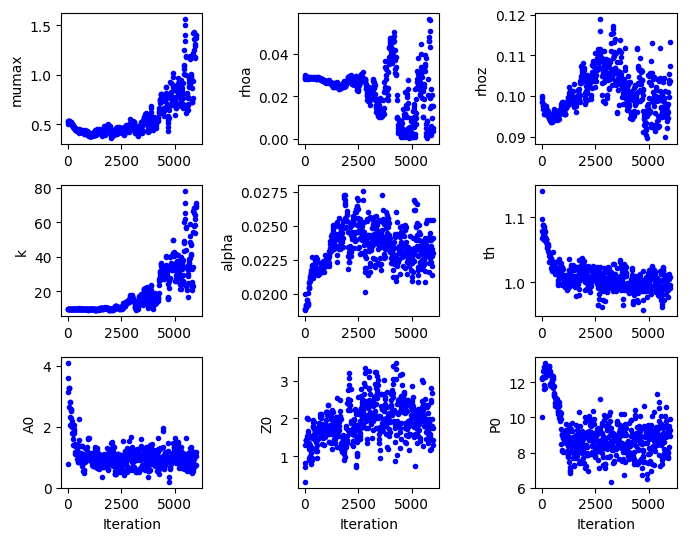

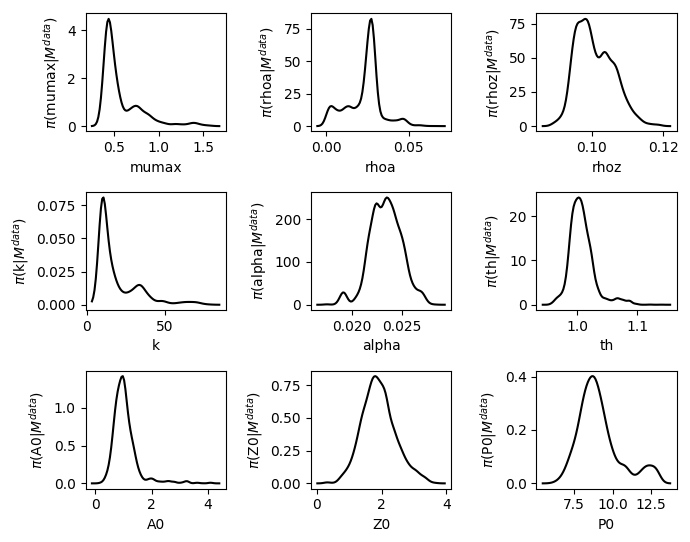

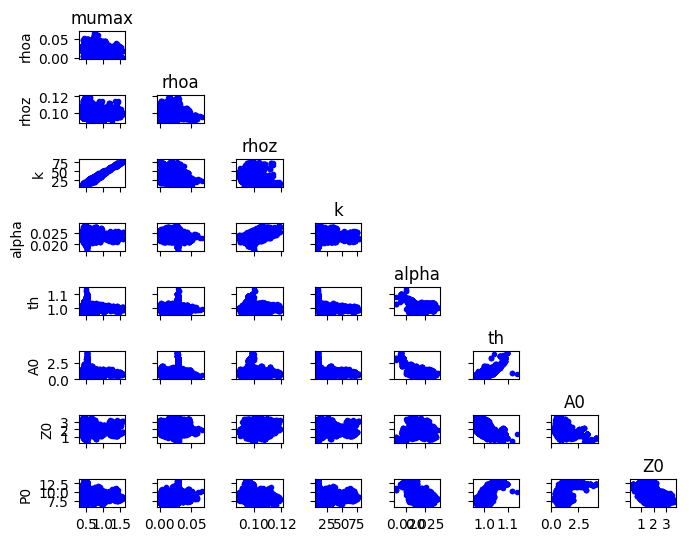

In [6]:
# extract info from results
results = mcstat.simulation_results.results
chain = results['chain']
s2chain = results['s2chain']
names = results['names'] # parameter names

# display chain stats
mcstat.chainstats(chain, results)

mcpl = MCMCPlotting
# plot chain panel
mcpl.plot_chain_panel(chain, names, figsizeinches = [7, 6]);
plt.savefig('algae_chain_panel.eps', format = 'eps', dpi = 500, bbox_inches='tight')
# plot density panel
mcpl.plot_density_panel(chain, names, figsizeinches = [7, 6]);
plt.savefig('algae_density_panel.eps', format = 'eps', dpi = 500, bbox_inches='tight')
# pairwise correlation
mcpl.plot_pairwise_correlation_panel(chain, names, figsizeinches = [7, 6]);
plt.savefig('algae_pairwise.eps', format = 'eps', dpi = 500, bbox_inches='tight')

### Generate prediction/credible intervals for each quantity of interest

In [7]:
def predmodelfun(data, theta):
    obj = data.user_defined_object[0]
    time = obj[:,0]
    xdata = obj
    # last 3 parameters are the initial states
    y0 = np.array(theta[-3:])
    # evaluate model    
    tmodel, ymodel = algfun.algaefun(time, theta, y0, xdata)
    return ymodel

mcstat.PI.setup_prediction_interval_calculation(results = results, data = mcstat.data, modelfunction = predmodelfun)
mcstat.PI.generate_prediction_intervals(nsample = 500, calc_pred_int = 'on', waitbar = True)

Generating credible/prediction intervals:

 [-----------------100%-----------------] 500 of 500 complete in 20.2 sec
Interval generation complete



### Plot intervals

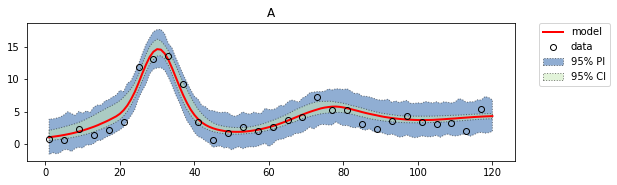

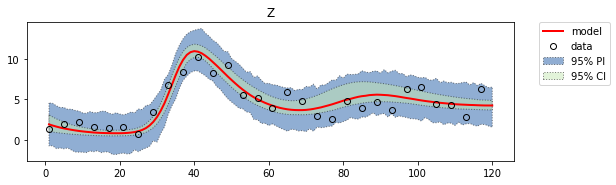

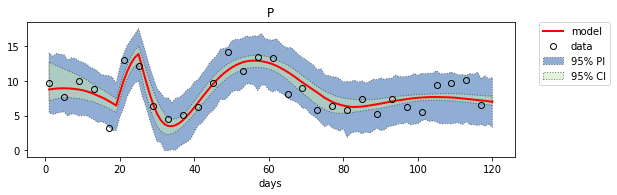

In [14]:
# plot prediction intervals
fighandle, axhandle = mcstat.PI.plot_prediction_intervals(adddata = False, addlegend=False, figsizeinches = [7.5,8])

for ii in range(3):
    axhandle[ii].plot(mcstat.data.ydata[0][:,0], mcstat.data.ydata[0][:,ii+1], 'ko', mfc='none', label = 'data')
    axhandle[ii].set_ylabel('')
    axhandle[ii].set_title(ylbls[ii+1][0])
    axhandle[ii].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axhandle[-1].set_xlabel('days');
plt.savefig('algae_ci.png', format = 'png', dpi = 500, bbox_inches='tight')